## Linear solver

In [1]:
using Revise, ReachabilityAnalysis, Plots

┌ Info: Precompiling ReachabilityAnalysis [1e97bd63-91d1-579d-8e8d-501d2b57c93f]
└ @ Base loading.jl:1278


In [2]:
X0 = BallInf(ones(2), 0.2)
prob = @ivp(x' = [0 1; -1 0.] * x, x(0) ∈ X0);

In [3]:
sol = solve(prob, T=6.0);

In [4]:
B = Ball2([0.0, -1.0], 0.5) # ball in the 2-norm
sol_touching = filter(R -> !isdisjoint(overapproximate(B, 1e-3), set(R)), array(sol));

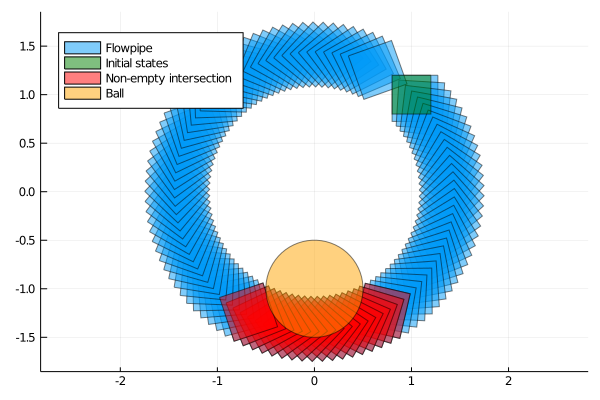

In [5]:
plot(sol, vars=(1, 2), ratio=1., lab="Flowpipe")
plot!(X0, color=:green, lab="Initial states")
plot!(sol_touching, vars=(1, 2), color=:red, alpha=.5, lab="Non-empty intersection")
plot!(B, color=:orange, lab="Ball", legend=:topleft)

## TMJets solver

In [19]:
@taylorize function f(dx, x, p, t)
    dx[1] = x[2]
    dx[2] = -x[1]
end

X0 = BallInf(ones(2), 0.2)
prob = @ivp(x' = f(x), x(0) ∈ X0, dim=2);
@time sol = solve(prob, T=6.0);
solz = overapproximate(sol, Zonotope);

  1.237080 seconds (2.41 M allocations: 166.125 MiB, 3.16% gc time)


In [7]:
B = Ball2([0.0, -1.0], 0.5) # ball in the 2-norm
sol_touching = filter(R -> !isdisjoint(overapproximate(B, 1e-3), set(R)), array(solz));

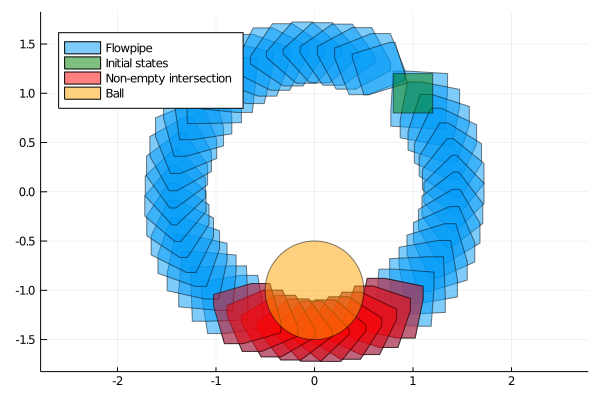

In [8]:
plot(solz, vars=(1, 2), ratio=1., lab="Flowpipe")
plot!(X0, color=:green, lab="Initial states")
plot!(sol_touching, vars=(1, 2), color=:red, alpha=.5, lab="Non-empty intersection")
plot!(B, color=:orange, lab="Ball", legend=:topleft)

In [24]:
X0 = BallInf(ones(2), 0.2)
prob = @ivp(x' = f(x), x(0) ∈ X0, dim=2);
@time sol = solve(prob, T=6.0, alg=TMJets(), external=false) # , solver_name=validated_integ);
solz = overapproximate(sol, Zonotope);

  0.131549 seconds (1.18 M allocations: 100.879 MiB, 18.85% gc time)


In [34]:
sol[end]

TaylorModelReachSet{Float64}(TaylorModels.TaylorModel1{TaylorN{Float64},Float64}[  0.6375424723669255 + 0.1899897254481651 x₁ - 0.062481230974780116 x₂ + ( 1.2623547821147272 + 0.062481230974780116 x₁ + 0.1899897254481651 x₂) t + ( - 0.31877123618346276 - 0.09499486272408254 x₁ + 0.031240615487390058 x₂) t² + ( - 0.21039246368578784 - 0.010413538495796685 x₁ - 0.03166495424136084 x₂) t³ + ( 0.02656426968195523 + 0.00791623856034021 x₁ - 0.0026033846239491712 x₂) t⁴ + ( 0.010519623184289393 + 0.0005206769247898343 x₁ + 0.0015832477120680422 x₂) t⁵ + ( - 0.0008854756560651743 - 0.00026387461867800703 x₁ + 8.677948746497238e-5 x₂) t⁶ + ( - 0.00025046721867355695 - 1.2397069637853196e-5 x₁ - 3.7696374096858146e-5 x₂) t⁷ + ( 1.581206528687811e-5 + 4.712046762107268e-6 x₁ - 1.5496337047316495e-6 x₂) t⁸ + [-5.60331e-13, 5.01823e-13],   1.2623547821147272 + 0.062481230974780116 x₁ + 0.1899897254481651 x₂ + ( - 0.6375424723669255 - 0.1899897254481651 x₁ + 0.062481230974780116 x₂) t + ( - 0.6311

## Test "external" TMJets solver

In [39]:
X0 = BallInf(ones(2), 0.2)
prob = @ivp(x' = f(x), x(0) ∈ X0, dim=2);
@time sole = solve(prob, T=6.0, alg=TMJets(), external=true) # , solver_name=validated_integ);
solez = overapproximate(sole, Zonotope);

  0.856345 seconds (1.81 M allocations: 133.094 MiB, 11.05% gc time)


In [33]:
sole[end]

TaylorModelReachSet{Float64}(TaylorModels.TaylorModel1{TaylorN{Float64},Float64}[  0.6375424723669255 + 0.1899897254481651 x₁ - 0.062481230974780116 x₂ + ( 1.2623547821147272 + 0.062481230974780116 x₁ + 0.1899897254481651 x₂) t + ( - 0.31877123618346276 - 0.09499486272408254 x₁ + 0.031240615487390058 x₂) t² + ( - 0.21039246368578784 - 0.010413538495796685 x₁ - 0.03166495424136084 x₂) t³ + ( 0.02656426968195523 + 0.00791623856034021 x₁ - 0.0026033846239491712 x₂) t⁴ + ( 0.010519623184289393 + 0.0005206769247898343 x₁ + 0.0015832477120680422 x₂) t⁵ + ( - 0.0008854756560651743 - 0.00026387461867800703 x₁ + 8.677948746497238e-5 x₂) t⁶ + ( - 0.00025046721867355695 - 1.2397069637853196e-5 x₁ - 3.7696374096858146e-5 x₂) t⁷ + ( 1.581206528687811e-5 + 4.712046762107268e-6 x₁ - 1.5496337047316495e-6 x₂) t⁸ + [-5.60331e-13, 5.01823e-13],   1.2623547821147272 + 0.062481230974780116 x₁ + 0.1899897254481651 x₂ + ( - 0.6375424723669255 - 0.1899897254481651 x₁ + 0.062481230974780116 x₂) t + ( - 0.6311

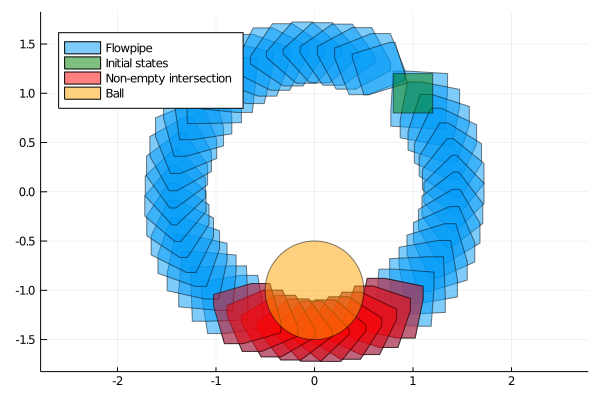

In [14]:
plot(solz, vars=(1, 2), ratio=1., lab="Flowpipe")
plot!(X0, color=:green, lab="Initial states")
plot!(sol_touching, vars=(1, 2), color=:red, alpha=.5, lab="Non-empty intersection")
plot!(B, color=:orange, lab="Ball", legend=:topleft)